In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import linregress
from statsmodels.api import OLS, add_constant

# === Parameters ===
START_DATE = "2005-12-31"
END_DATE = "2025-07-31"
REBALANCE_MONTHS = [3, 6, 9, 12]  # Quarterly

# Step 1: Load NSE500 list
nse500 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50", header=0)[1]
symbols = nse500['Symbol'].tolist()

# Step 2: Download adjusted close daily price history
data = {}
for symbol in tqdm(symbols):
    try:
        df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
        if df.empty or 'Close' not in df.columns:
            continue
        df = df[['Close']].rename(columns={'Close': symbol})
        data[symbol] = df
    except:
        continue

if not data:
    raise ValueError("No valid price data downloaded.")

prices = pd.concat(data.values(), axis=1)
prices.index = pd.to_datetime(prices.index)
prices = prices.dropna(axis=1, how='all')

# Step 3: Calculate trailing 12-month daily volatility using log returns
log_returns = np.log(prices / prices.shift(1))
vol_scores = log_returns.rolling(window=252).std()


  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\3509793419.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
  2%|▏         | 1/50 [00:01<01:16,  1.56s/it]C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\3509793419.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
  4%|▍         | 2/50 [00:01<00:41,  1.15it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\3509793419.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
  6%|▌         | 3/50 [00:02<00:30,  1.53it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\3509793419.py:22: FutureWarning: YF.downlo

In [3]:
prices

Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,3.578889,NaN,223.895752,47.873131,50.409950,313.918610,3.736514,1962.401733,7.271637,140.857346,...,55.032551,157.873276,69.148193,104.642998,18.934370,NaN,36.133202,64.754921,387.105560,47.494595
2006-01-03,3.620712,NaN,223.717728,48.230198,50.637245,315.719391,3.702060,1973.658936,7.310605,143.508392,...,55.020458,162.139008,69.905525,105.608345,19.294075,NaN,36.122410,65.461113,400.316345,48.657009
2006-01-04,3.641623,NaN,225.586884,47.913712,51.843727,321.145081,3.689152,2007.576538,7.291489,142.887039,...,55.016426,163.065262,70.011627,107.858116,19.196657,NaN,37.158634,66.153717,404.077881,49.490246
2006-01-05,3.614737,NaN,232.195633,47.877186,53.102673,324.041992,3.662152,2025.685913,7.252156,141.851486,...,54.512203,162.060501,69.590881,105.870117,19.004313,NaN,34.934940,66.360863,411.050171,48.765018
2006-01-06,3.641623,NaN,239.249344,47.925869,54.877419,320.479614,3.643516,2003.416748,7.273109,143.839783,...,54.826828,159.557159,69.166473,105.878326,19.194157,NaN,33.611973,66.478828,430.820679,48.626152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-14,2581.300049,1433.000000,7220.000000,2401.600098,1172.699951,8087.500000,918.849976,2003.599976,407.299988,1904.974609,...,1682.599976,3211.800049,1071.800049,674.500000,160.440002,1576.699951,3404.699951,5314.500000,12516.000000,254.250000
2025-07-15,2598.199951,1445.099976,7360.500000,2393.500000,1165.900024,8311.000000,928.400024,2036.500000,408.950012,1918.164307,...,1727.500000,3241.300049,1081.800049,684.400024,159.000000,1579.000000,3415.000000,5390.000000,12502.000000,257.399994


In [4]:
qtr_vol = vol_scores.resample('Q').last()
qtr_vol

C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\778360393.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  qtr_vol = vol_scores.resample('Q').last()


Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-31,0.038955,NaN,0.023320,0.019365,0.030160,0.023922,0.037102,0.025773,0.028487,0.022506,...,0.019702,0.021828,0.023029,0.025523,0.031584,NaN,0.031866,0.019832,0.029634,0.025902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,0.025600,0.025546,0.013641,0.011636,0.015267,0.015210,0.016076,0.013982,0.024555,0.013814,...,0.011713,0.012865,0.013784,0.018057,0.018325,0.015799,0.014085,0.022080,0.014410,0.017594
2024-12-31,0.029453,0.026332,0.013825,0.013175,0.015494,0.018124,0.016193,0.014005,0.025111,0.014654,...,0.011936,0.013102,0.015756,0.018483,0.018607,0.016133,0.014656,0.022979,0.014705,0.017880


In [31]:
qtr_vol.head(50)

Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-31,0.038955,NaN,0.023320,0.019365,0.030160,0.023922,0.037102,0.025773,0.028487,0.022506,...,0.019702,0.021828,0.023029,0.025523,0.031584,NaN,0.031866,0.019832,0.029634,0.025902
2007-06-30,0.028615,NaN,0.020373,0.015342,0.027132,0.020430,0.026433,0.020455,0.023859,0.019022,...,0.016346,0.017753,0.019452,0.021657,0.024134,NaN,0.026678,0.015832,0.024025,0.021138
2007-09-30,0.030589,NaN,0.019084,0.016393,0.026177,0.020189,0.024272,0.020340,0.022485,0.019623,...,0.015882,0.017516,0.019336,0.020919,0.026632,0.031403,0.026027,0.015835,0.023974,0.020486
2007-12-31,0.032702,NaN,0.015549,0.020015,0.027701,0.020039,0.024394,0.020477,0.023410,0.024373,...,0.018016,0.018862,0.021894,0.021453,0.031769,0.027271,0.027381,0.020224,0.024797,0.022102


In [15]:
monthly_prices = prices.resample('QE').last()
monthly_prices

Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,3.575901,NaN,225.542358,52.425522,62.256187,430.028259,4.443854,2688.238525,9.735340,170.971542,...,69.344307,179.524841,63.433403,152.469009,26.802877,NaN,37.649734,65.315178,626.644104,57.575745
2006-06-30,7.764216,NaN,178.413452,48.766342,47.330544,430.419800,3.465011,2690.685303,7.874146,153.263397,...,63.547821,163.434692,56.042938,132.256561,27.349735,NaN,26.776598,50.368553,685.955261,52.807774
2006-09-30,8.271673,NaN,214.187668,55.689411,66.981667,469.198578,3.278351,2933.104004,8.588291,194.375290,...,75.617859,192.439011,55.787895,143.379822,27.452236,122.518311,36.487270,63.728851,820.937134,53.995907
2006-12-31,14.018534,NaN,193.218872,61.150730,82.949883,410.125824,3.370116,2563.823486,9.986593,260.941254,...,79.758644,230.722290,53.627918,149.852493,21.846996,331.368011,38.893375,63.833427,1011.194092,62.328285
2007-03-31,13.098172,NaN,225.825211,63.915039,86.623985,380.131622,3.912244,2376.319824,11.192182,316.426788,...,86.401054,233.499283,45.158978,121.166542,20.370472,283.034180,38.117722,49.255711,713.786865,57.544888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,3134.247559,1441.188354,7188.981934,3293.021484,1231.147827,12040.789062,770.299988,1972.439087,283.529663,1695.376831,...,1908.874268,4206.322754,1188.144165,966.341614,164.708893,1535.110352,3812.476318,7568.093262,11802.000000,265.450287
2024-12-31,2527.357666,1225.139404,7286.044922,2260.494385,1063.790771,8581.120117,682.299988,1567.336304,291.535309,1574.586670,...,1868.897583,4044.997314,907.970642,733.840576,134.903961,1675.584473,3243.388916,7117.184082,11426.349609,295.968842


In [21]:
# Step 4: Backtest low volatility strategy using quarterly rebalancing
low_vol_returns = []
high_vol_returns = []
benchmark_returns = []

for i in range(4, len(qtr_vol)):
    date = qtr_vol.index[i]
    if date.month not in REBALANCE_MONTHS:
        continue

    scores = qtr_vol.loc[date].dropna()
    low_vol_stocks = scores.sort_values(ascending=True).head(int(len(scores) * 0.1)).index
    high_vol_stocks = scores.sort_values(ascending=False).head(int(len(scores) * 0.1)).index

    try:
        next_date = qtr_vol.index[i + 1]
    except IndexError:
        break

    try:
        next_returns_low = monthly_prices.loc[next_date, low_vol_stocks] / monthly_prices.loc[date, low_vol_stocks] - 1
        low_vol_returns.append((next_date, next_returns_low.mean()))

        next_returns_high = monthly_prices.loc[next_date, high_vol_stocks] / monthly_prices.loc[date, high_vol_stocks] - 1
        high_vol_returns.append((next_date, next_returns_high.mean()))
    except:
        continue

low_df = pd.DataFrame(low_vol_returns, columns=["Date", "Return"]).set_index("Date")
low_df["Cumulative"] = (1 + low_df["Return"]).cumprod()

high_df = pd.DataFrame(high_vol_returns, columns=["Date", "Return"]).set_index("Date")
high_df["Cumulative"] = (1 + high_df["Return"]).cumprod()



In [28]:
low_df.head(50)

,Return,Cumulative
Date,,
2007-06-30,0.057388,1.057388
2007-09-30,-0.012292,1.044391
2007-12-31,0.189363,1.242160
2008-03-31,-0.050873,1.178968
2008-06-30,0.022577,1.205586
2008-09-30,-0.054217,1.140222
2008-12-31,-0.064189,1.067032
2009-03-31,0.001694,1.068840
2009-06-30,0.205222,1.288189


C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\2147152444.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Close"].resample('Q').last()
[*********************100%***********************]  1 of 1 completed
C:\Users\amitt\AppData\Local\Temp\ipykernel_18876\2147152444.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Close"].resample('Q').last()


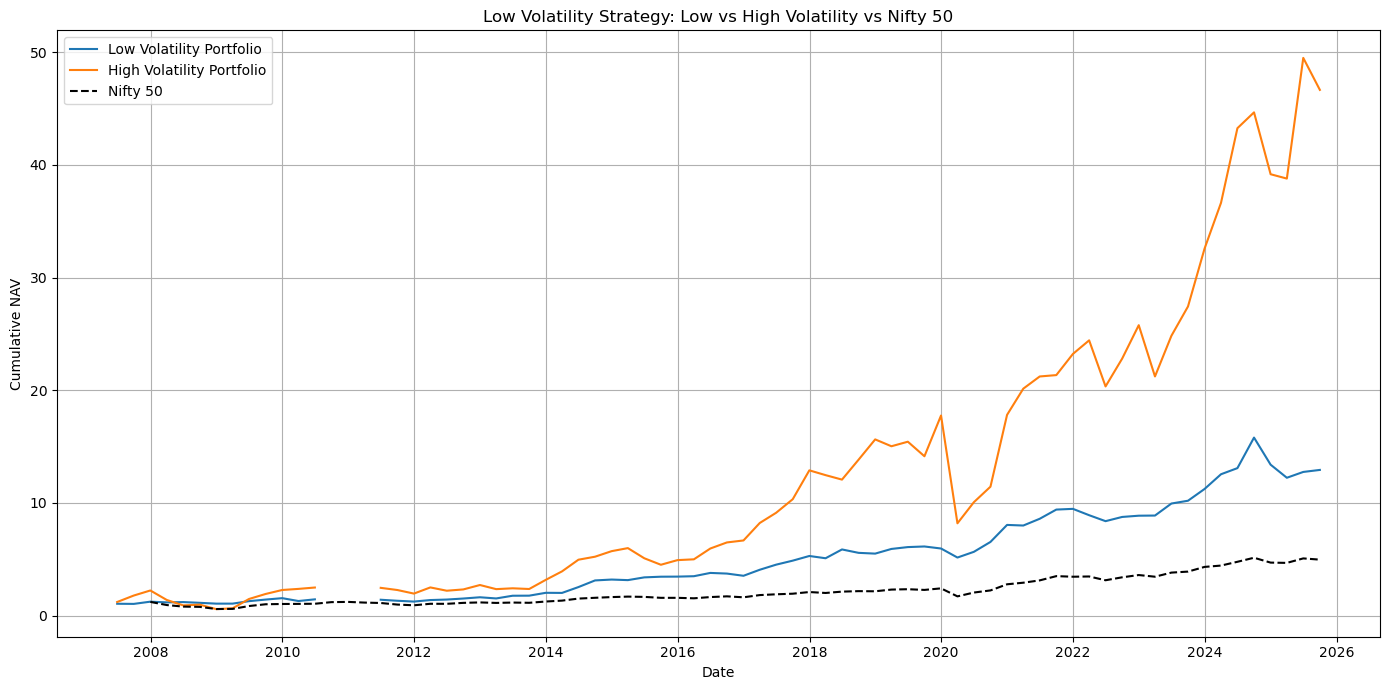

In [26]:
# Step 5: Benchmark returns
benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Close"].resample('QE').last()
benchmark_ret = benchmark.pct_change().dropna()
benchmark_cum = (1 + benchmark_ret).cumprod()

# Step 6: Plot
plt.figure(figsize=(14, 7))
plt.plot(low_df["Cumulative"], label="Low Volatility Portfolio")
plt.plot(high_df["Cumulative"], label="High Volatility Portfolio")
plt.plot(benchmark_cum, label="Nifty 50", linestyle='--', color='black')
plt.title("Low Volatility Strategy: Low vs High Volatility vs Nifty 50")
plt.ylabel("Cumulative NAV")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
low_vol_returns